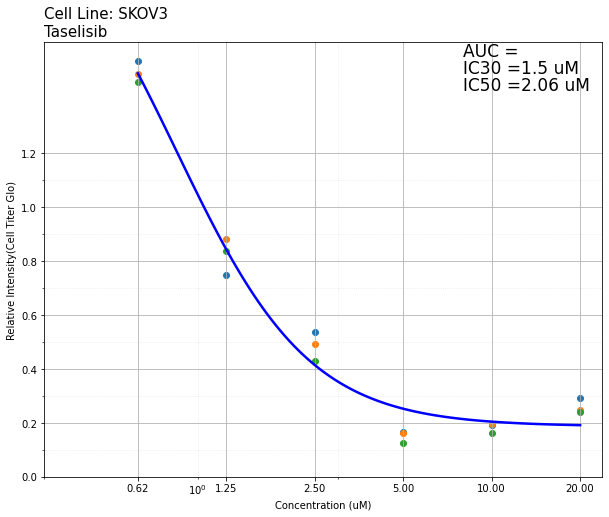

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as optimization
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
xdata = np.array([20,10,5,2.5,1.25,.625])

ydata4 = np.array([0.291929077,0.191105009,0.16711001,0.534907666,0.747509163,1.542877258])
ydata5 = np.array([0.246758937,0.196879753,0.160648323,0.490890049,0.882302155,1.492591552])
ydata6 = np.array([0.240899226,0.162554349,0.123719778,0.428455064,0.835750294,1.464451185])

ydata7 = np.array((ydata4+ydata5+ydata6)/3)

cell_line = 'SKOV3'

def fourPL(x, A, B, C, D):
    return ((A-D)/(1.0+((x/C)**B))) + D
#def fourPL(x,A,B,C,D):
    #y = A/(1+np.exp(-C*(x-B)))+D
    #return y
#def fourPL(x,b,c,d,e):
    '''This function is basically a copy of the LL.4 function from the R drc package with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50'''
    
 #   return(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))
def get_ic50():
    A,B,C,D = params
    solveforx = ((A-D)/(.5-D) - 1.0)**(1./B)*C
    ic50 = fourPL(solveforx, *params)
    return solveforx
def get_ic30():
    A,B,C,D = params
    solveforx = ((A-D)/(.7-D) - 1.0)**(1./B)*C
    ic30 = fourPL(solveforx, *params)
    if isNaN(solveforx):
        solveforx = '+'
    
    return solveforx




params,params_covariance = optimization.curve_fit(fourPL,xdata,ydata7,maxfev = 1000)


x_min, x_max = np.amin(xdata), np.amax(xdata)
xs = np.logspace(np.log10(x_min), np.log10(x_max), 100)



fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(xdata, ydata4)
ax.scatter(xdata, ydata5)
ax.scatter(xdata, ydata6)

ax.plot(xs, fourPL(xs, *params),linewidth = 2.5, color = 'blue')


ax.set_xscale('log')

ax.set_xticks([0.625,1.25,2.5,5,10,20])

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis]:
    axis.set_major_formatter(ScalarFormatter())





major_xticks = [0.625,1.25,2.5,5,10,20]
major_yticks = [0,0.2,0.4,0.6,0.8,1,1.2]
minor_xticks = [0.3,1,3,10]
minor_yticks = [0.1,0.3,0.5,0.7,0.9,1.1]

ax.set_xticks(minor_xticks, minor=True)
ax.set_xticks(major_xticks)
ax.set_yticks(minor_yticks, minor=True)
ax.set_yticks(major_yticks)
# And a corresponding grid
ax.set_ylabel("Relative Intensity(Cell Titer Glo)")
ax.set_xlabel("Concentration (uM)")
ax.set_title("Cell Line: " + cell_line + '\n' + 'Taselisib', fontsize=15,loc = 'left')
ax.grid(which='minor', alpha=0.3, linestyle=':')
ax.grid(which='major', alpha=2)

ax.text(.75, 1, 'AUC = ', transform=ax.transAxes, fontsize = 17,verticalalignment = 'top')
if type(get_ic30()) == np.float64:
    ax.text(.75, .96, 'IC30 =' + str(round(get_ic30(),2)) + ' uM', transform=ax.transAxes, fontsize=17,verticalalignment='top')
else:
    ax.text(.75, .96, 'IC30 =' + str(get_ic30()), transform=ax.transAxes, fontsize=17,verticalalignment='top')
if type(get_ic50()) == np.float64:
    ax.text(.75, .920, 'IC50 =' + str(round(get_ic50(),2)) + ' uM', transform=ax.transAxes, fontsize=17,
        verticalalignment='top')
else:
    ax.text(.75, .920, 'IC50 =' + str(get_ic50()), transform=ax.transAxes, fontsize=17,verticalalignment='top')



plt.show()

In [21]:
T = fourPL(xs, *params)
for i in range(len(fourPL(xs, *params))):
    if fourPL(xs, *params)[i] >= 0.4999 and fourPL(xs, *params)[i] < 0.502:
        print(xs[i])

2.0549450440772388


In [25]:
A,B,C,D = params

In [115]:
print('y = ((%.10f - %.10f)/(1.0+((x/%.10f)**%.10f)))+%.10f' % (A, D, C,B,D))

y = ((33868.5393998334 - 0.3481476141)/(1.0+((x/0.0000019311)**0.8728877082)))+0.3481476141


In [30]:
T = ((33868.5393998334 - 0.3481476141)/(1.0+((2.0549450440772388/0.0000019311)**0.8728877082)))+0.3481476141

In [9]:
c = 0
for i in T:
    c += 1
    if i >= 0.4999 and i < 0.502:
        break;

In [31]:
T

0.5338850209132253

In [12]:
xs[35]

2.128157407451283

In [10]:
c

35

In [24]:
ydata7

array([0.33477335, 0.40181364, 0.45935778, 0.57130868, 0.55172208,
       0.89566303])

<ipython-input-181-e08a26f4d872>:21: RuntimeWarning: invalid value encountered in power
  return ((A-D)/(1.0+((x/C)**B))) + D


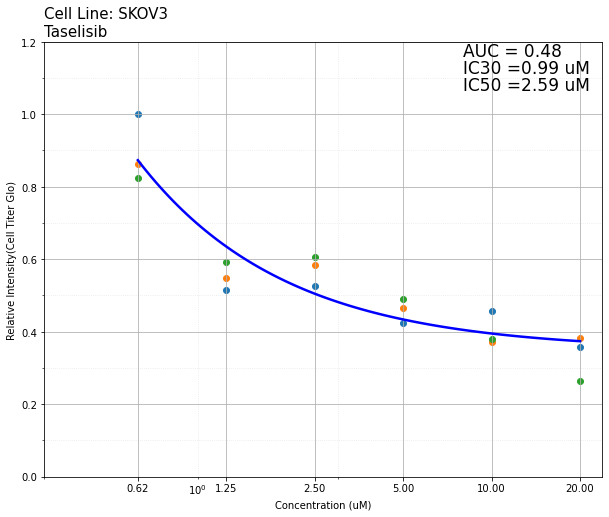

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as optimization
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
xdata = np.array([20,10,5,2.5,1.25,.625])

ydata4 = np.array([0.358351419,0.45589522,0.423240536,0.526212045,0.514630774,1.000263127])
ydata5 = np.array([0.382171082,0.370498997,0.464067632,0.583082679,0.547200206,0.863646869])
ydata6 = np.array([0.263797551,0.379046696,0.490765172,0.604631318,0.593335274,0.823079084])

ydata7 = np.array((ydata4+ydata5+ydata6)/3)

cell_line = 'SKOV3'

def fourPL(x, A, B, C, D):
    return ((A-D)/(1.0+((x/C)**B))) + D
#def fourPL(x,A,B,C,D):
    #y = A/(1+np.exp(-C*(x-B)))+D
    #return y
#def fourPL(x,b,c,d,e):
    '''This function is basically a copy of the LL.4 function from the R drc package with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50'''
    
 #   return(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))




params,params_covariance = optimization.curve_fit(fourPL,xdata,ydata7,maxfev = 20000)




x_min, x_max = np.amin(xdata), np.amax(xdata)
xs = np.logspace(np.log10(x_min), np.log10(x_max), 100)



fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(xdata, ydata4)
ax.scatter(xdata, ydata5)
ax.scatter(xdata, ydata6)

ax.plot(xs, fourPL(xs, *params),linewidth = 2.5, color = 'blue')


ax.set_xscale('log')

ax.set_xticks([0.625,1.25,2.5,5,10,20])

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis]:
    axis.set_major_formatter(ScalarFormatter())





major_xticks = [0.625,1.25,2.5,5,10,20]
major_yticks = [0,0.2,0.4,0.6,0.8,1,1.2]
minor_xticks = [0.3,1,3]
minor_yticks = [0.1,0.3,0.5,0.7,0.9,1.1]

ax.set_xticks(minor_xticks, minor=True)
ax.set_xticks(major_xticks)
ax.set_yticks(minor_yticks, minor=True)
ax.set_yticks(major_yticks)
# And a corresponding grid
ax.set_ylabel("Relative Intensity(Cell Titer Glo)")
ax.set_xlabel("Concentration (uM)")
ax.set_title("Cell Line: " + cell_line + '\n' + 'Taselisib', fontsize=15,loc = 'left')
ax.grid(which='minor', alpha=0.3, linestyle=':')
ax.grid(which='major', alpha=2)
ax.text(.75, 1, 'AUC = ' + str(round(AUC,2)), transform=ax.transAxes, fontsize = 17,verticalalignment = 'top')

if type(get_ic30()) == np.float64:
    ax.text(.75, .96, 'IC30 =' + str(round(get_ic30(),2)) + ' uM', transform=ax.transAxes, fontsize=17,verticalalignment='top')
else:
    ax.text(.75, .96, 'IC30 =' + str(get_ic30()), transform=ax.transAxes, fontsize=17,verticalalignment='top')
if type(get_ic50()) == np.float64:
    ax.text(.75, .920, 'IC50 =' + str(round(get_ic50(),2)) + ' uM', transform=ax.transAxes, fontsize=17,
        verticalalignment='top')
else:
    ax.text(.75, .920, 'IC50 =' + str(get_ic50()), transform=ax.transAxes, fontsize=17,verticalalignment='top')

plt.show()

In [148]:
if type(get_ic50()) == np.float64:
    print('yes')

yes


In [128]:
print(get_ic30())

nan


<ipython-input-121-1d6523039f5f>:40: RuntimeWarning: invalid value encountered in double_scalars
  solveforx = ((A-D)/(.3-D) - 1.0)**(1./B)*C


In [129]:
def isNaN(num):
    return num != num

In [130]:
isNaN(get_ic30())

<ipython-input-121-1d6523039f5f>:40: RuntimeWarning: invalid value encountered in double_scalars
  solveforx = ((A-D)/(.3-D) - 1.0)**(1./B)*C


True

In [32]:
from sympy import symbols, exp
n0, Qv, R, T = symbols('n0 Qv R T')
expr = n0*exp(-Qv/(R*T))

In [182]:


x = np.linspace(x_min, x_max, 100)
A,B,C,D = params
y = ((A-D)/(1.0+((x/C)**(B))) + D)
approximation = np.trapz(y,x)
print(approximation)
np.max(y)
total = np.max(y) * (x_max - x_min)
AUC = (approximation/total)


8.176442365998534


In [185]:
total

16.916149496859262

In [168]:
x_min, x_max

(0.625, 20.0)

In [33]:
expr.subs(n0, 3.48e-6).subs(Qv,12700).subs(R, 8031).subs(T, 1000+273)

3.48e-6*exp(-12700/10223463)

In [39]:
expr2 = expr.subs(n0, 3.48e-6).subs(Qv,12700).subs(R, 8031).subs(T, 1000+273)


In [38]:
expr2.evalf()

3.47567968697765e-6

In [45]:
x, A,B,C,D = symbols('X ,A, B, C, D')
exprr = ((A-D)/(1.0+((x/C)**B))) + D

In [42]:
exprrr = ((33868.53940 - 0.34815)/(1.0+((x/0.00000)**0.87289)))+0.34815

In [44]:
from sympy import *
solve(Eq(exprrr, .5), x)

KeyboardInterrupt: 

In [46]:
((A-D)/(Y-D) - 1.0)**(1./B)*C

D + (A - D)/((X/C)**B + 1.0)

In [47]:
x, A,B,C,D = symbols('X ,A, B, C, D')
exprrrrr = ((A-D)/(x-D) - 1.0)**(1./B)*C

In [48]:
exprrrrr

C*((A - D)/(-D + X) - 1.0)**(1.0/B)

In [49]:
A,B,C,D = params

In [50]:
mid = ((A-D)/(0.5-D) - 1.0)**(1./B)*C

In [51]:
mid

2.588347218570348

In [53]:
midpoint = fourPL(mid,params)

TypeError: fourPL() missing 3 required positional arguments: 'B', 'C', and 'D'

In [54]:
midpoint = fourPL(mid, *params)

In [55]:
midpoint

0.49999999999999994

In [62]:
def get_ic50():
    A,B,C,D = params
    solveforx = ((A-D)/(.5-D) - 1.0)**(1./B)*C
    ic50 = fourPL(solveforx, *params)
    return solveforx



2.59